Se tiene una señal obtenida de un EMG (Electromiograma) con 1 activación muscular en el archivo
(EMG_raw.npy). Esta ha sido muestreada a 1 kHz y se encuentra contaminada con ruido de alta frecuencia

a) [Tarea asíncrona] Cargar la señal EMG y graficarla en el dominio del tiempo. Calcular la
transformada de Fourier y graficar la magnitud de la respuesta en frecuencia de la señal,
destacando el ruido a 60 Hz mediante líneas verticales (1 punto).

In [2]:
#-----------IMPORTAMOS LAS LIBRERÍAS
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym
from scipy.signal import lfilter

C:\Users\Hineill\AppData\Local\Temp\ipykernel_26608\1324982405.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


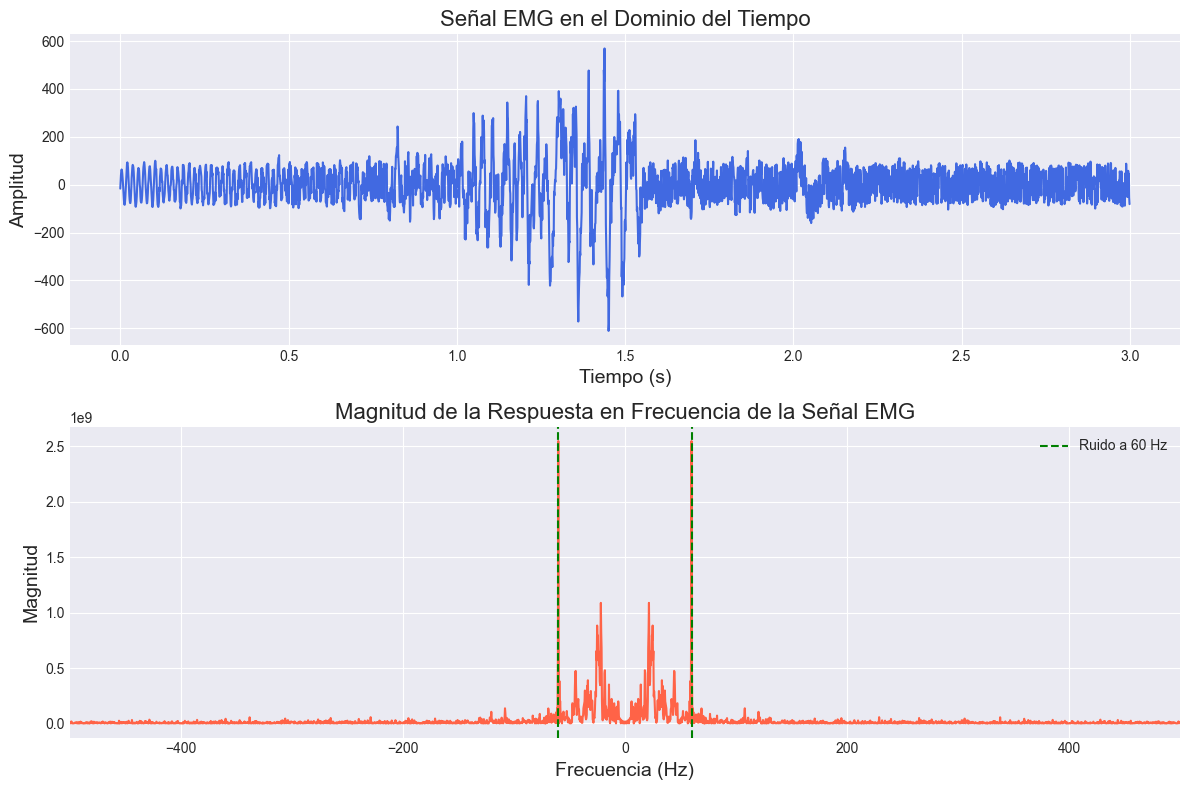

In [4]:
emg_signal = np.load("EMG_raw.npy")  # Carga la señal desde el archivo
fs = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)
t = np.arange(n_samples) / fs

# Calcular la Transformada de Fourier

fft_emg_signal = np.fft.fftshift(np.fft.fft(emg_signal))
freq = (np.arange(n_samples) - n_samples/2) * fs / n_samples
magnitud_fft_emg_signal = np.abs(fft_emg_signal)**2

plt.style.use('seaborn-darkgrid')  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(t, emg_signal, color='royalblue')
ax1.set_title('Señal EMG en el Dominio del Tiempo', fontsize=16)
ax1.set_xlabel('Tiempo (s)', fontsize=14)
ax1.set_ylabel('Amplitud', fontsize=14)
ax1.grid(True)
ax2.plot(freq, magnitud_fft_emg_signal, color='tomato')
ax2.axvline(60, color='green', linestyle='--', label='Ruido a 60 Hz')
ax2.axvline(-60, color='green', linestyle='--')
ax2.set_title('Magnitud de la Respuesta en Frecuencia de la Señal EMG', fontsize=16)
ax2.set_xlabel('Frecuencia (Hz)', fontsize=14)
ax2.set_ylabel('Magnitud', fontsize=14)
ax2.set_xlim(-fs/2, fs / 2)  
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

b) [Tarea asíncrona] Diseñar un filtro FIR utilizando el método de ventanas con una ventana de
Hamming, con frecuencia de corte de 50 Hz y 33 coeficientes. Graficar la respuesta impulsiva, su
magnitud y fase de la respuesta en frecuencia para ambas ventanas, comparándolas con la
respuesta ideal (1 punto).

Text(0.5, 0, 'Indice')

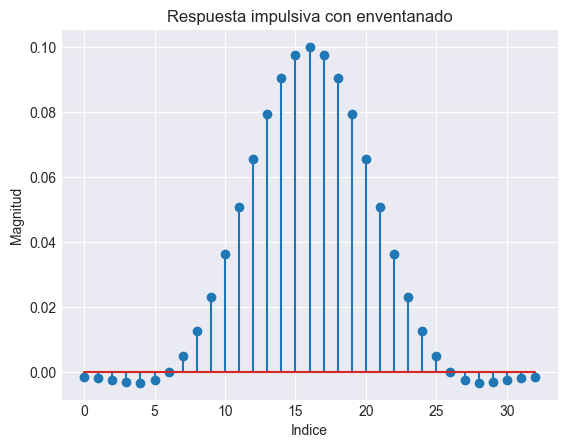

In [45]:
M=32
num_coe= M+1
f_c =  50
signal_hamming =  np.hamming(num_coe)
w_c = 2*np.pi*f_c 
#Normalizamos frecuencia de corte
w_c = w_c/fs
n=np.arange(M+1)
h_n = w_c* np.sinc(((n-M/2)*w_c)/np.pi)/np.pi #Caso ideal
h_total = h_n * signal_hamming
plt.title("Respuesta impulsiva con enventanado")
plt.stem(h_total)
plt.ylabel("Magnitud")
plt.xlabel("Indice")


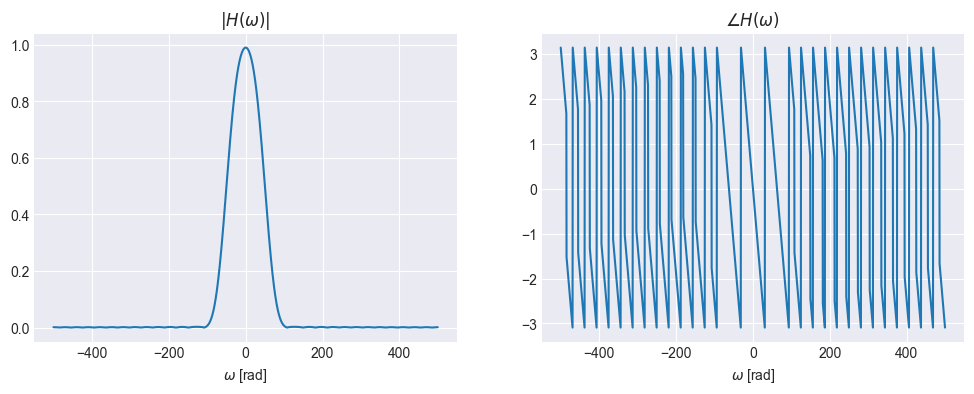

In [49]:
#Calculamos espectro
N = 2048


fft_filter_enventado = np.fft.fftshift(np.fft.fft(h_total,N))
n_samples = len(h_total)
freq = (np.arange(N) - N/2) * fs / N
magnitud_fft_filter_enventado = np.abs(fft_filter_enventado)**2

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(freq,np.abs(fft_filter_enventado))
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(freq,np.angle(fft_filter_enventado))
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')